1. Choose five of the functions we wrote and write documentation for them. You can either use the `roxygen` format or your own, but I need to understand what the function does, what its arguments mean/what their datatypes are, who made it, and when was it made.
2. Re-run the above sets of simulations (for some set of `n`) and plot the results for the a uniform variable on $[0, 10]$.
3. Create a function that calculates the inverse cdf of any random variable you would like. (If you don't have a favorite random variable, use  $X \sim f(x) = 3x^2$... but don't forget to calculate the cdf!)
2. Run a Monte Carlo simulation to estimate the mean of the random variable from your answer to (3). Does your estimated solution match the theoretical value?
3. Run a Monte Carlo simulation to estimate the mean of a standard normal random variable, i.e. $X \sim \mathcal{N}(0, 1)$.
4. Modify the above functions to estimate *any* moment by Monte Carlo.

In [27]:
## Reproduce code from class
rand_sample <- function(n, F_inv=function(x) x){
    unif_sample <- runif(n)
    return(F_inv(unif_sample))
}

mc_mean <- function(n, F_inv=function(x) x){
    sample <- rand_sample(n, F_inv=function(x) F_inv(x))
    return(sum(sample)/n)
}

plot_results <- function(n_vec, F_inv=function(x) x){
    results <- rep(0, length(n_vec))
    i <- 1
    for(n in n_vec){
        results[i] <- mc_mean(n, F_inv=function(x) F_inv(x))
        i <- i + 1
    }
    plot(n_vec, results, type="l")
}

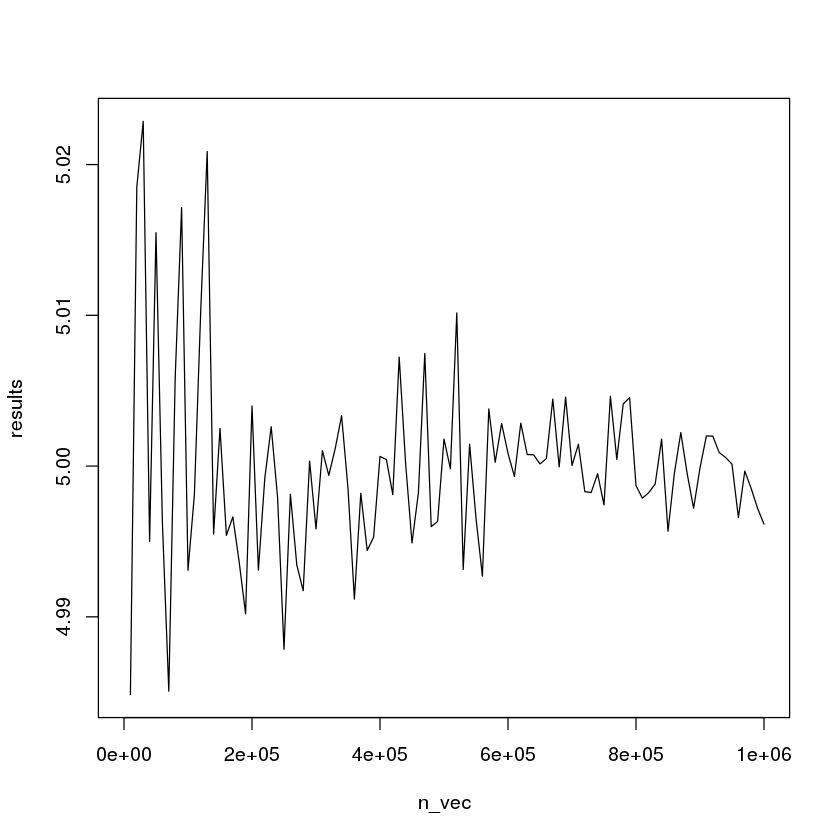

In [29]:
# Re-run the above sets of simulations (for some set of `n`) 
# and plot the results for the a uniform variable on $[0, 10]$.
F_inv_unif <- function(x, a, b) x*(b - a) + a

# A quick example
#N <- seq(0, 10000, 100)

# This one takes a lot longer
N <- seq(0, 1000000, 10000)
plot_results(N, F_inv=function(x) F_inv_unif(x, 0, 10))

In [ ]:
# Create a function that calculates the inverse cdf of any 
# random variable you would like. (If you don't have a 
# favorite random variable, use  $X \sim f(x) = 3x^2$... 
# but don't forget to calculate the cdf!)

The cdf of this random variable is given by
$$
\begin{align*}
    F(x) &= \int_0^x 3 t^2 dt\\
        &= \left[t^3\right]_0^x \\
        &= x^3
\end{align*}
$$
which admits a bijective inverse on the support $[0, 1]$:
$$
F^{-1} = x^{1/3}
$$
This is the function we need to code:

In [8]:
our_F_inv <- function(x) x^(1/3)
our_F_inv(0.5)

[1] 0.7937005

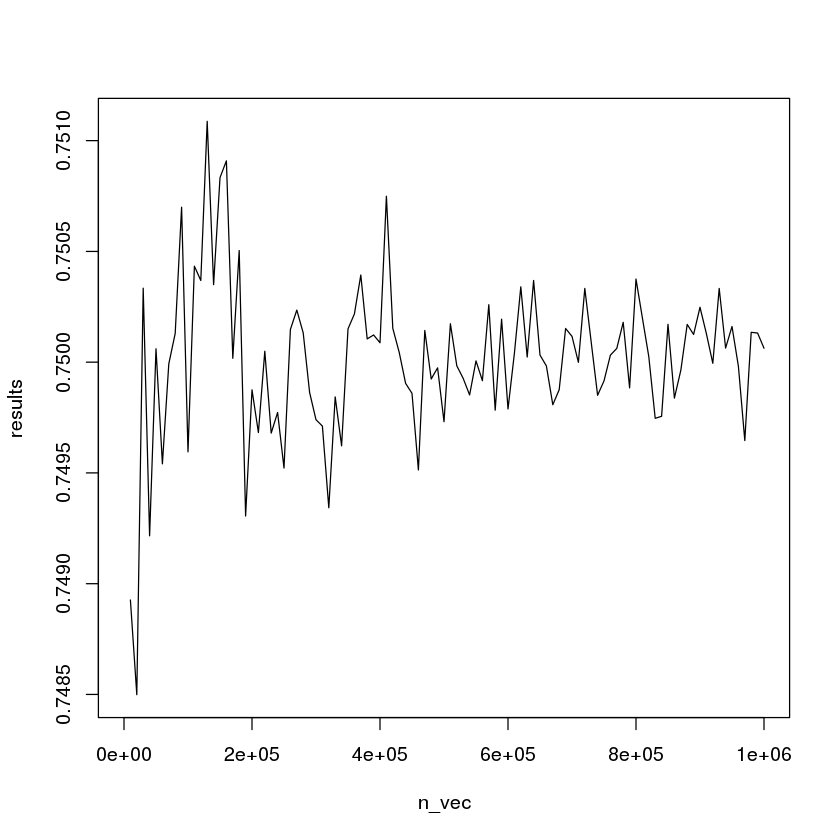

In [30]:
# Run a Monte Carlo simulation to estimate the mean of the
# random variable from your answer to (3). 
# Does your estimated solution match the theoretical value?
N <- seq(0, 1000000, 10000)
plot_results(N, F_inv=function(x) our_F_inv(x))

The theoretical value can be calculated easily:
$$
\begin{align*}
\mathbb{E}x &= \int_0^1 xf(x)dx \\
    &= \int_0^1 3 x^3 \\
    &= \left[\frac{3}{4} x^4 \right]_0^1 \\
    &= \frac{3}{4}
\end{align*}
$$

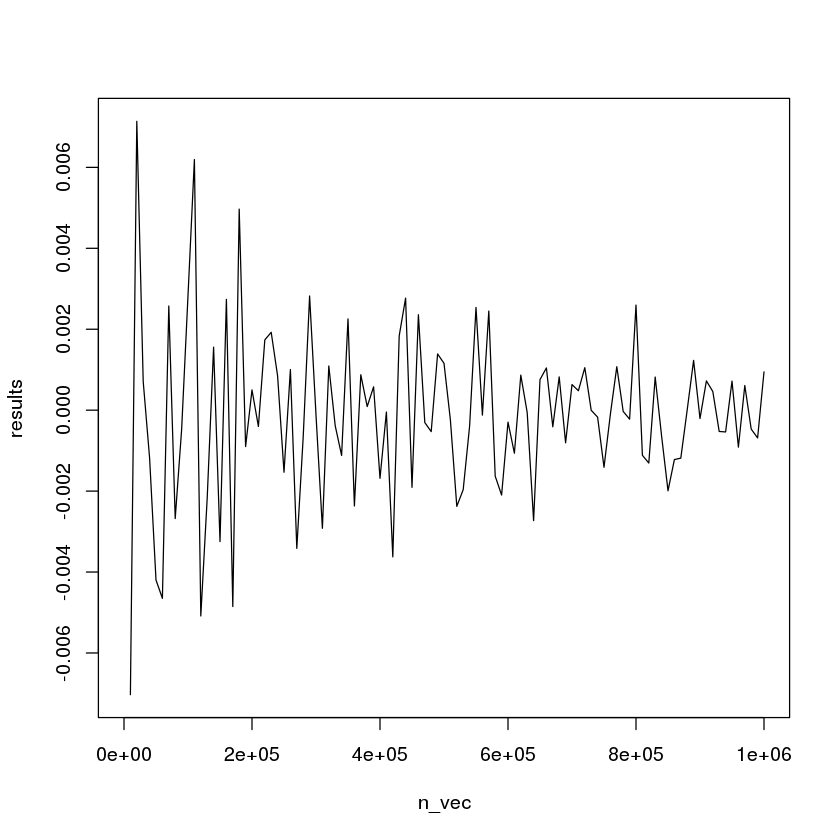

In [31]:
# Run a Monte Carlo simulation to estimate the mean 
# of a standard normal random variable,
# i.e. $X \sim \mathcal{N}(0, 1)$.
N <- seq(0, 1000000, 10000)
plot_results(N, F_inv=function(x) qnorm(x))

In [32]:
# Modify the above functions to estimate *any* moment by
# Monte Carlo.

rand_sample <- function(n, F_inv=function(x) x){
    unif_sample <- runif(n)
    return(F_inv(unif_sample))
}

# add mom variable
mc_mean <- function(n, mom=function(x) x, F_inv=function(x) x){
    sample <- rand_sample(n, F_inv=function(x) F_inv(x))
    return(sum(mom(sample))/n)
}

# add moment function
plot_results <- function(n_vec, moment=function(x) x,
                         F_inv=function(x) x){
    results <- rep(0, length(n_vec))
    i <- 1
    for(n in n_vec){
        results[i] <- mc_mean(n, mom=function(x) moment(x),
                              F_inv=function(x) F_inv(x))
        i <- i + 1
    }
    plot(n_vec, results, type="l")
}

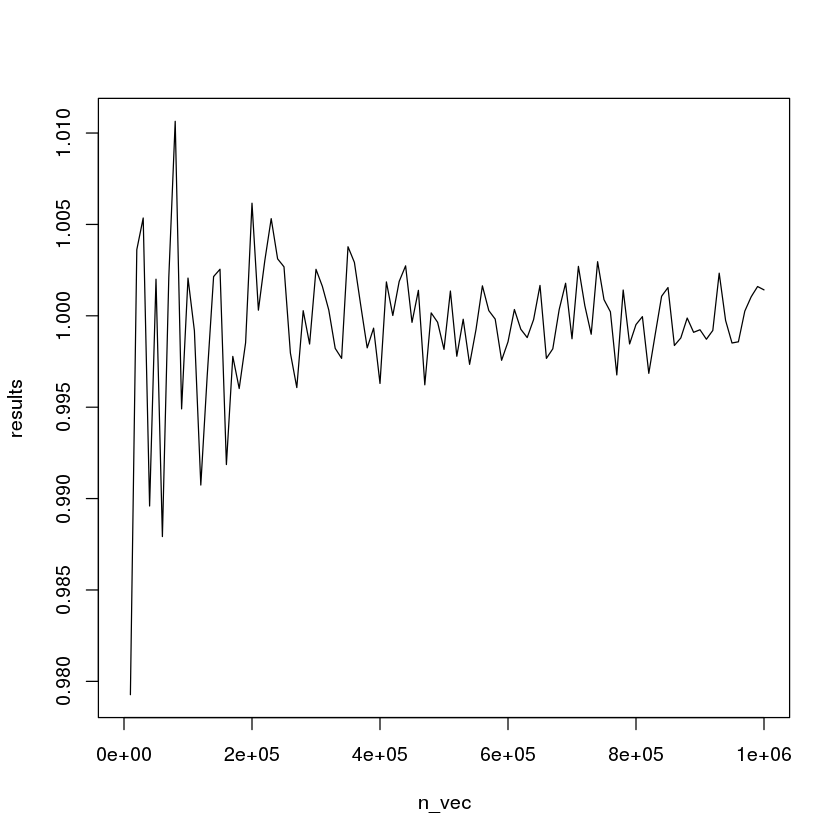

In [34]:
N <- seq(0, 1000000, 10000)
plot_results(N, moment=function(x) x^2,
             F_inv=function(x) qnorm(x))